In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('WORK_bank_data_train.csv', sep=';')

In [5]:
df

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,...,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,...,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,...,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,...,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,...,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,NaN,No,unknown,12,South East,6.0,42,Silver,Yes,...,No,2139.03,3155.41,4291.97,10,14,989.90,F,No,No
985473,1201048572,63.0,No,senior,33,South East,9.0,51,Tin,No,...,No,1916.91,3000.02,4045.15,11,30,884.63,F,No,No
985474,1201048573,68.0,No,senior,51,North,3.0,56,Gold,Yes,...,No,2053.00,3112.87,4292.20,8,16,922.66,M,No,No
985475,1201048574,45.0,No,middle,45,Midlands,1.0,54,Gold,Yes,...,No,2082.85,3143.77,4207.48,8,15,951.42,M,No,No


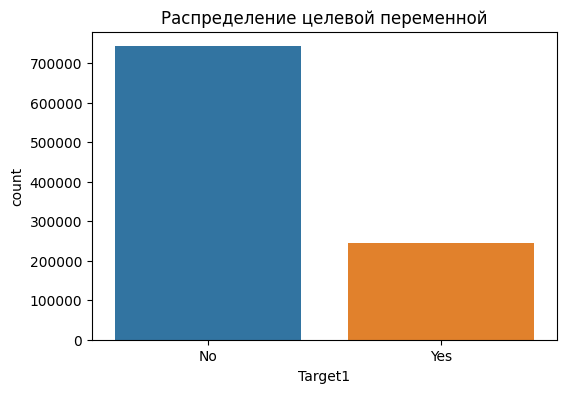

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target1', data=df)
plt.title('Распределение целевой переменной')
plt.show()

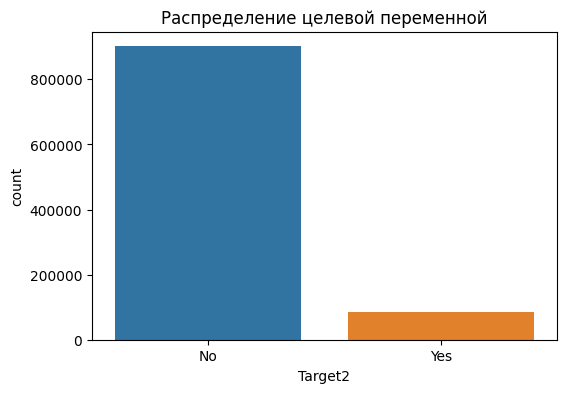

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target2', data=df)
plt.title('Распределение целевой переменной')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985477 entries, 0 to 985476
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              985477 non-null  int64  
 1   Age             918519 non-null  float64
 2   Ind_Household   985477 non-null  object 
 3   Age_group       985477 non-null  object 
 4   District        985477 non-null  object 
 5   Region          985477 non-null  object 
 6   Lifetime        972869 non-null  float64
 7   Income          985477 non-null  int64  
 8   Segment         985477 non-null  object 
 9   Ind_deposit     985477 non-null  object 
 10  Ind_email       985477 non-null  object 
 11  Ind_phone       985477 non-null  object 
 12  Ind_salary      985477 non-null  object 
 13  trans_6_month   985477 non-null  float64
 14  trans_9_month   985477 non-null  float64
 15  trans_12_month  985477 non-null  float64
 16  amont_trans     985477 non-null  int64  
 17  amont_day_

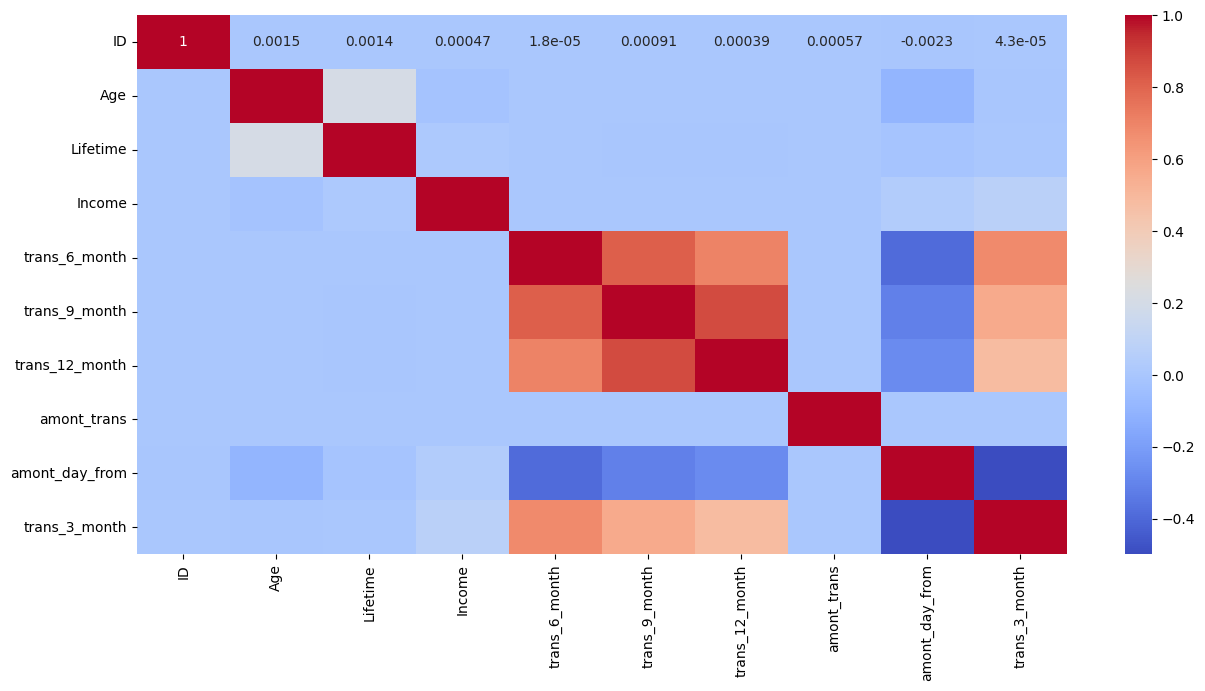

In [14]:
fig = plt.figure(figsize = (15, 7))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, cmap = 'coolwarm');